In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_dataset(file_path):
    """Loads the dataset from the specified file path and returns a pandas DataFrame."""
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.json'):
        return pd.read_json(file_path)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)

In [3]:
data=load_dataset('creditcard.csv')

Dataset shape: (284807, 31)
Dataset data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Number of missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amou

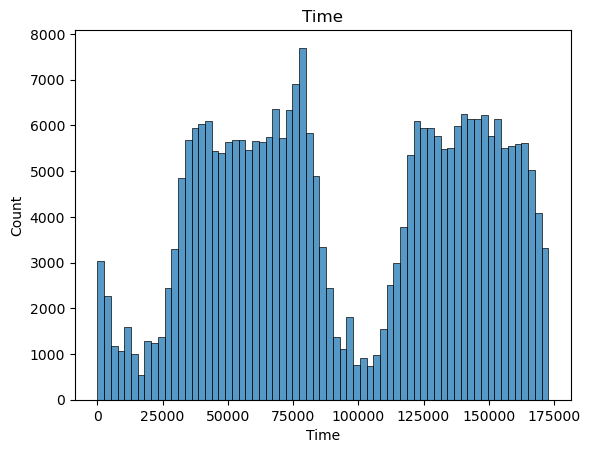

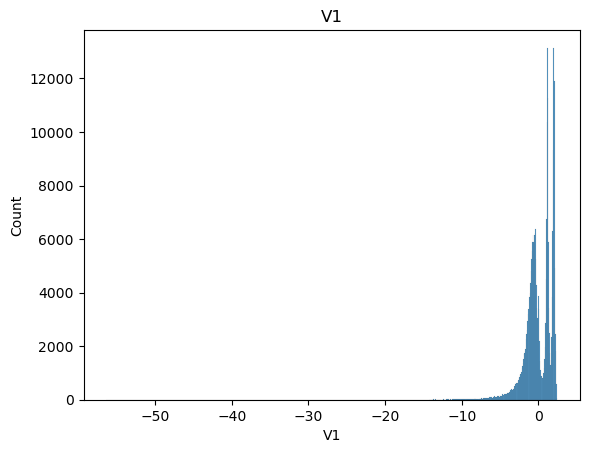

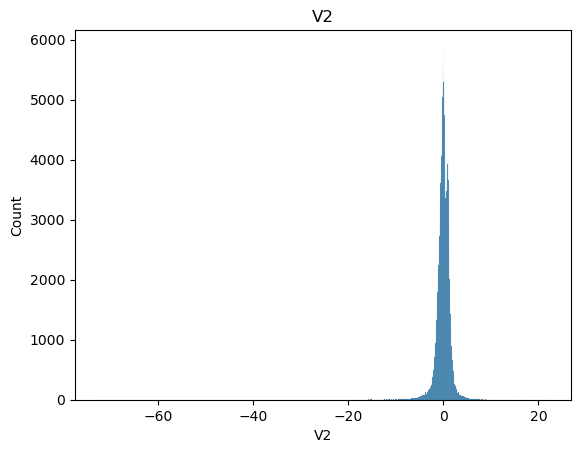

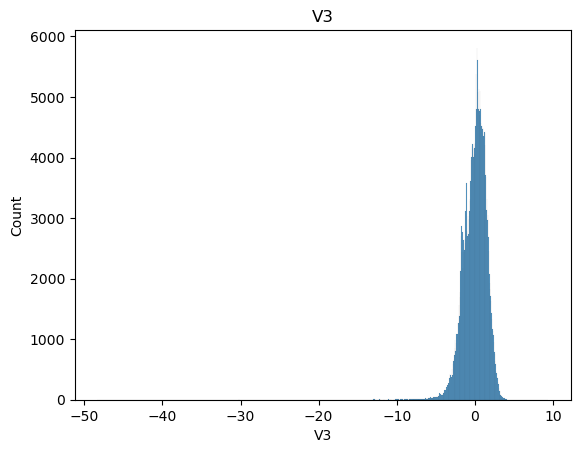

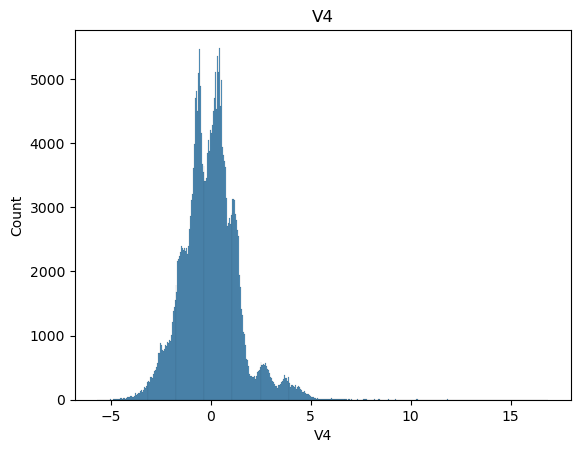

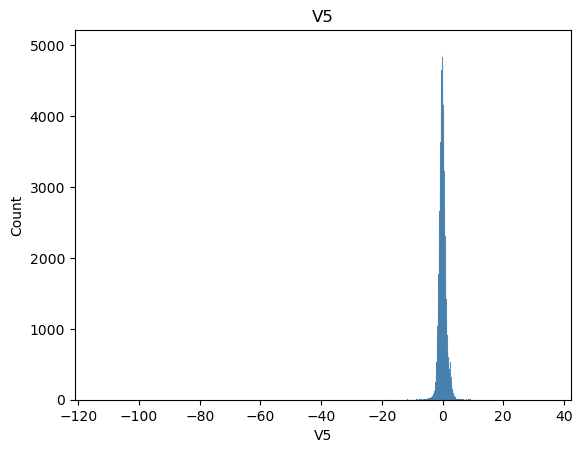

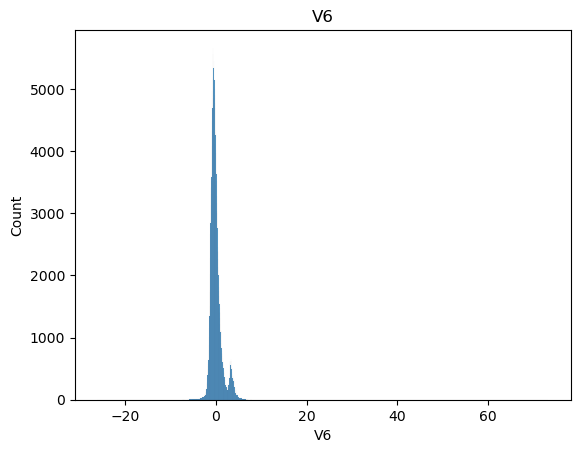

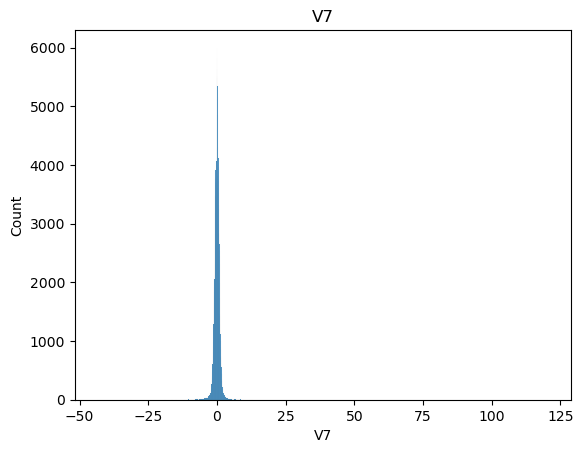

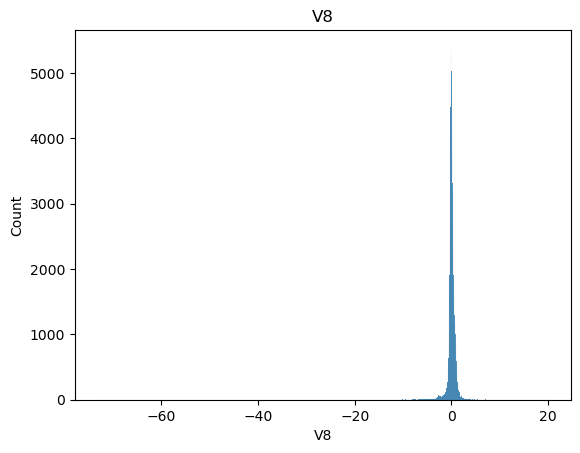

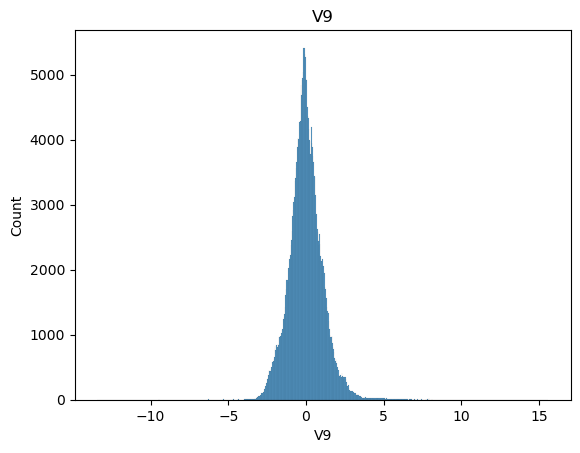

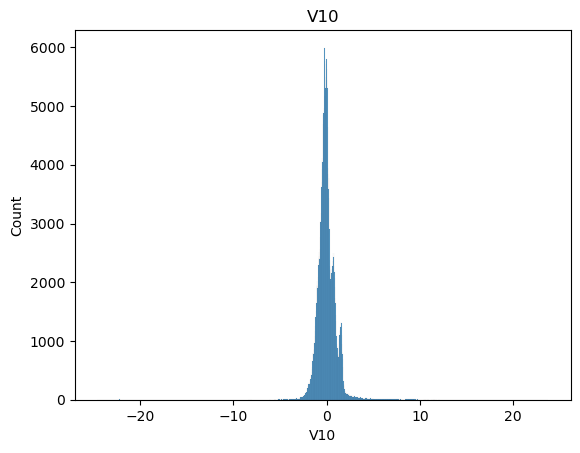

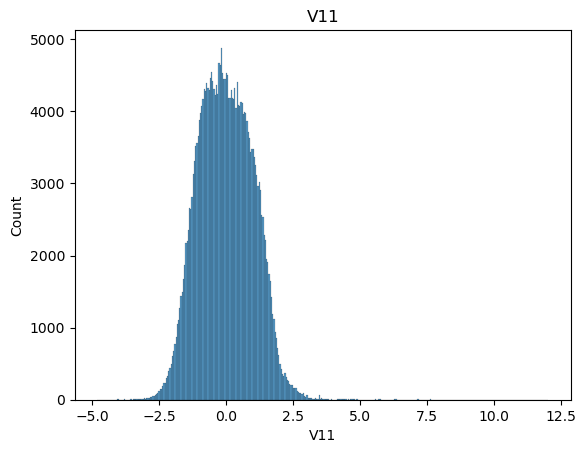

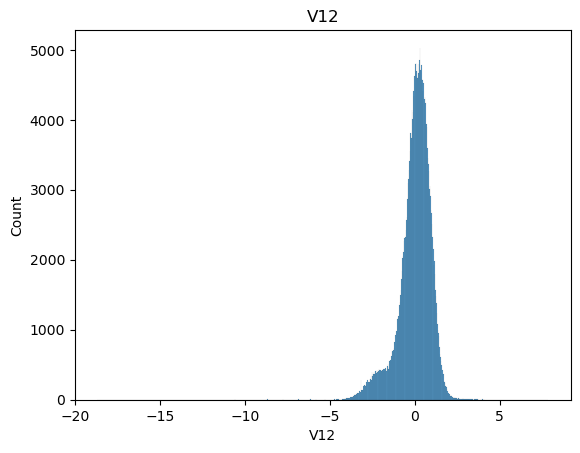

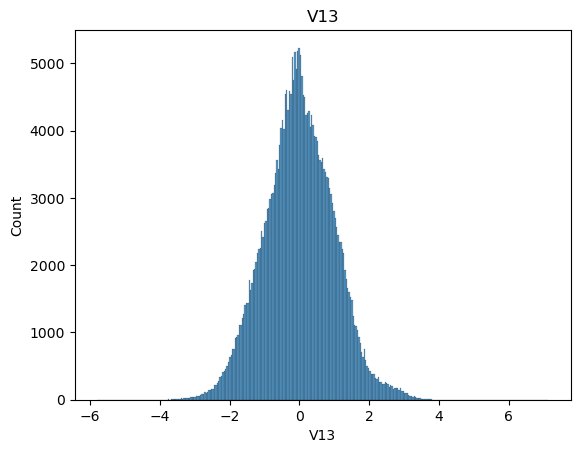

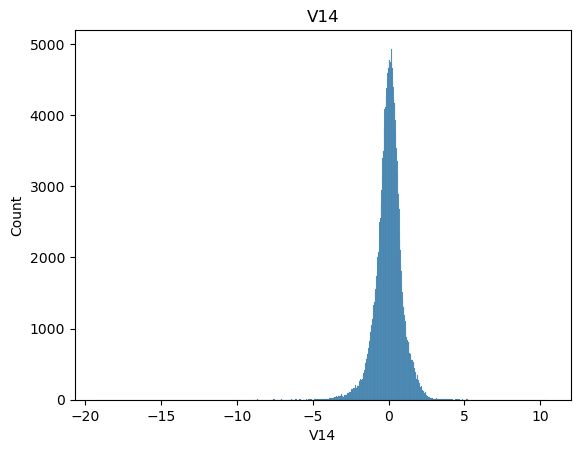

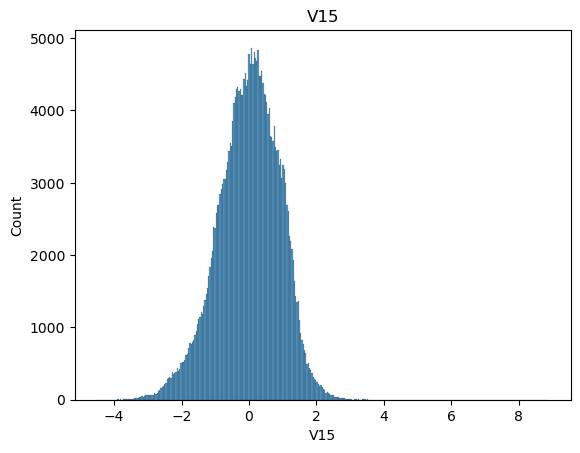

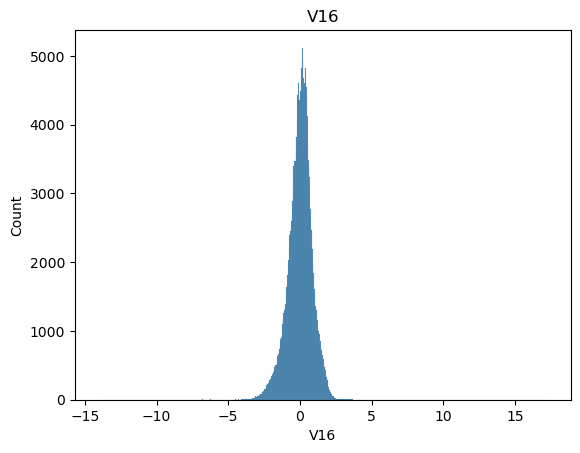

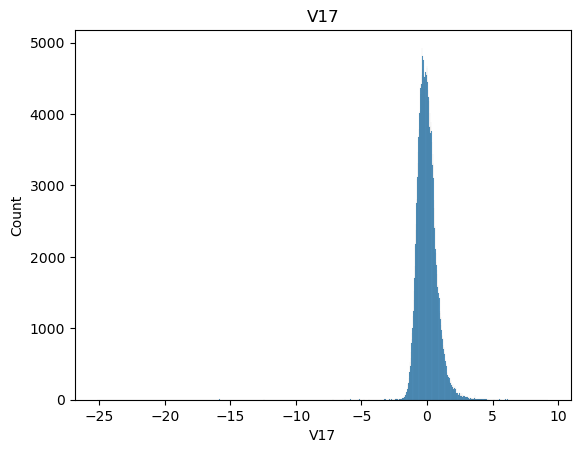

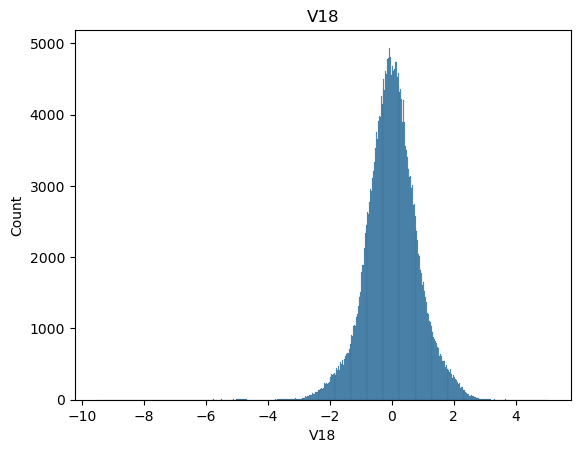

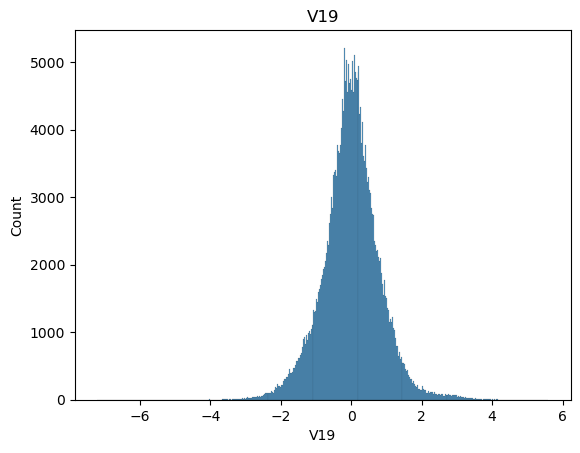

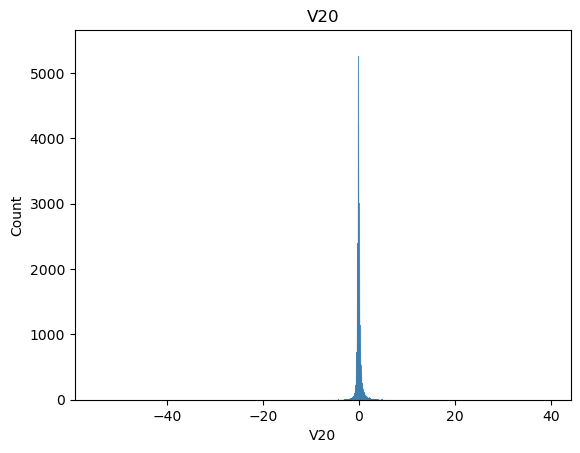

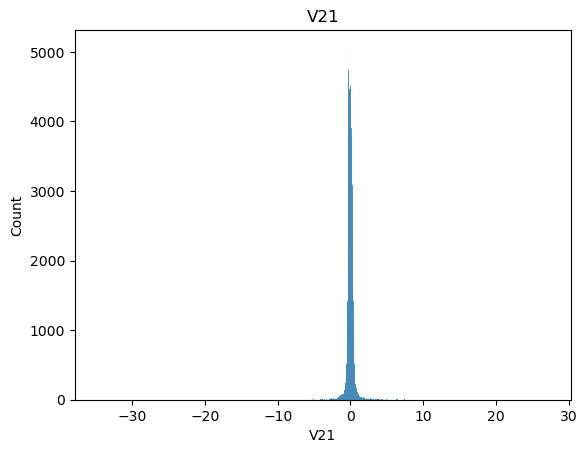

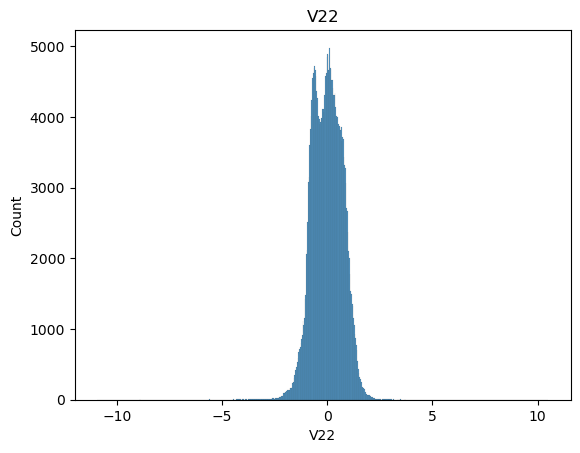

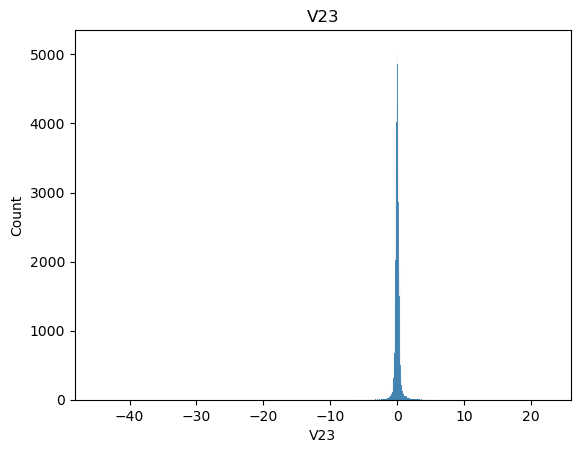

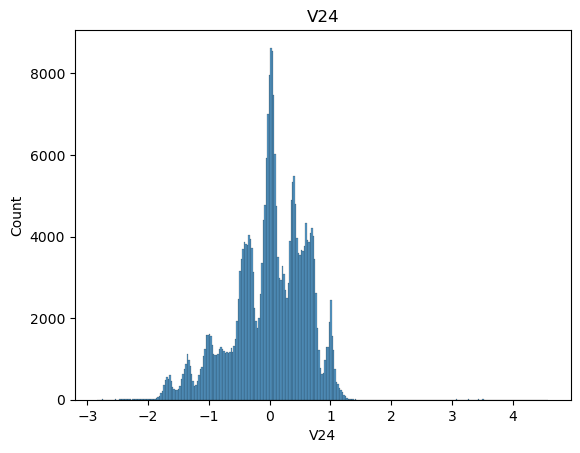

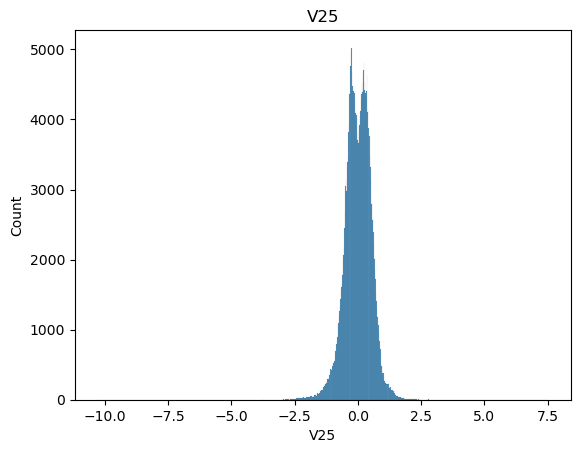

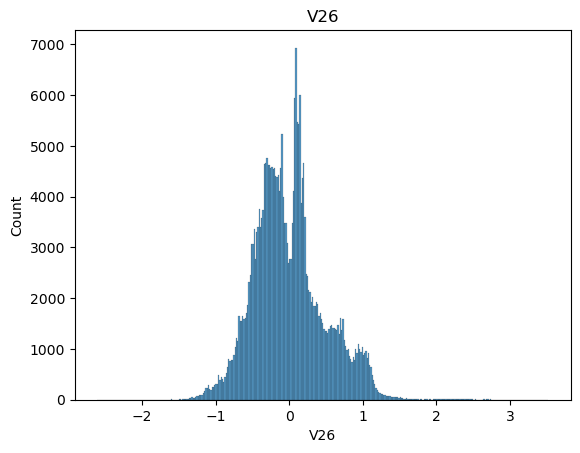

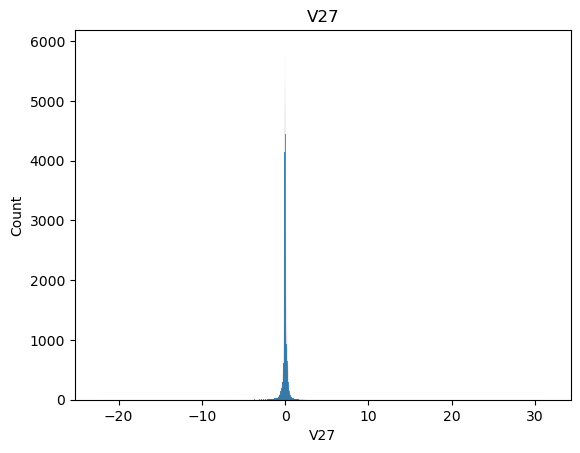

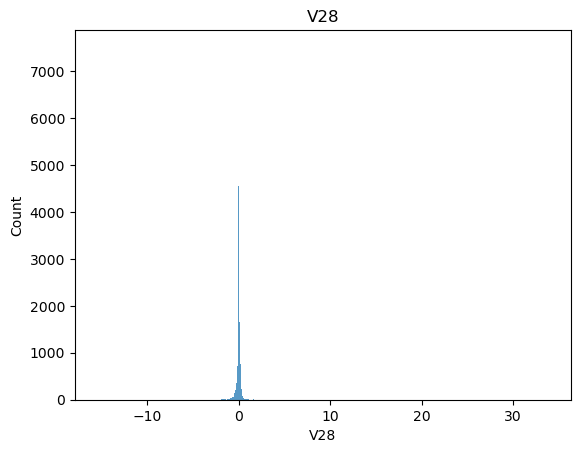

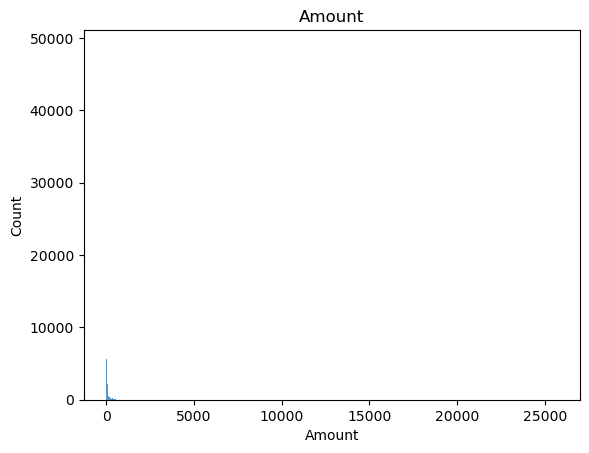

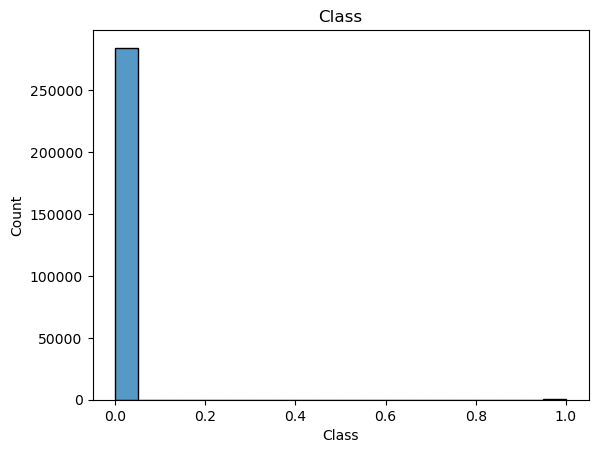

In [4]:
def explore_dataset(data):
    """Provides summary statistics and visualizations of the dataset."""
    print("Dataset shape:", data.shape)
    print("Dataset data types:\n", data.dtypes)
    print("Number of missing values:\n", data.isna().sum())
    print("Dataset description:\n", data.describe())

    # Visualize the distribution of values for each column
    for col in data.columns:
        if data[col].dtype == 'object':
            sns.countplot(data[col])
            plt.title(col)
            plt.show()
        else:
            sns.histplot(data[col])
            plt.title(col)
            plt.show()
explore_dataset(data)

In [5]:
def clean_dataset(data, drop_missing=True):
    """Performs data cleaning on the dataset."""
    # Remove duplicate rows
    data.drop_duplicates(inplace=True)

    # Fill missing values
    data.fillna(method='ffill', inplace=True)

    # Drop columns with a high percentage of missing values
    missing_percent = data.isnull().sum() / len(data) * 100
    to_drop = list(missing_percent[missing_percent > 50].index)
    data.drop(to_drop, axis=1, inplace=True)

    # Drop rows with missing values if drop_missing is True
    if drop_missing:
        data.dropna(inplace=True)
        
    return data
clean_dataset(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [7]:
frauds = data.loc[data['Class'].values == 1, :]
frauds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [8]:
#Balancing the data
no_frauds = data.drop(index = frauds.index)
no_frauds = no_frauds.sample(n = 492)
balanced = pd.concat([no_frauds, frauds])
balanced['Class'].value_counts()

0    492
1    473
Name: Class, dtype: int64

Text(0.5, 1.0, 'correlation between variables in th dataset')

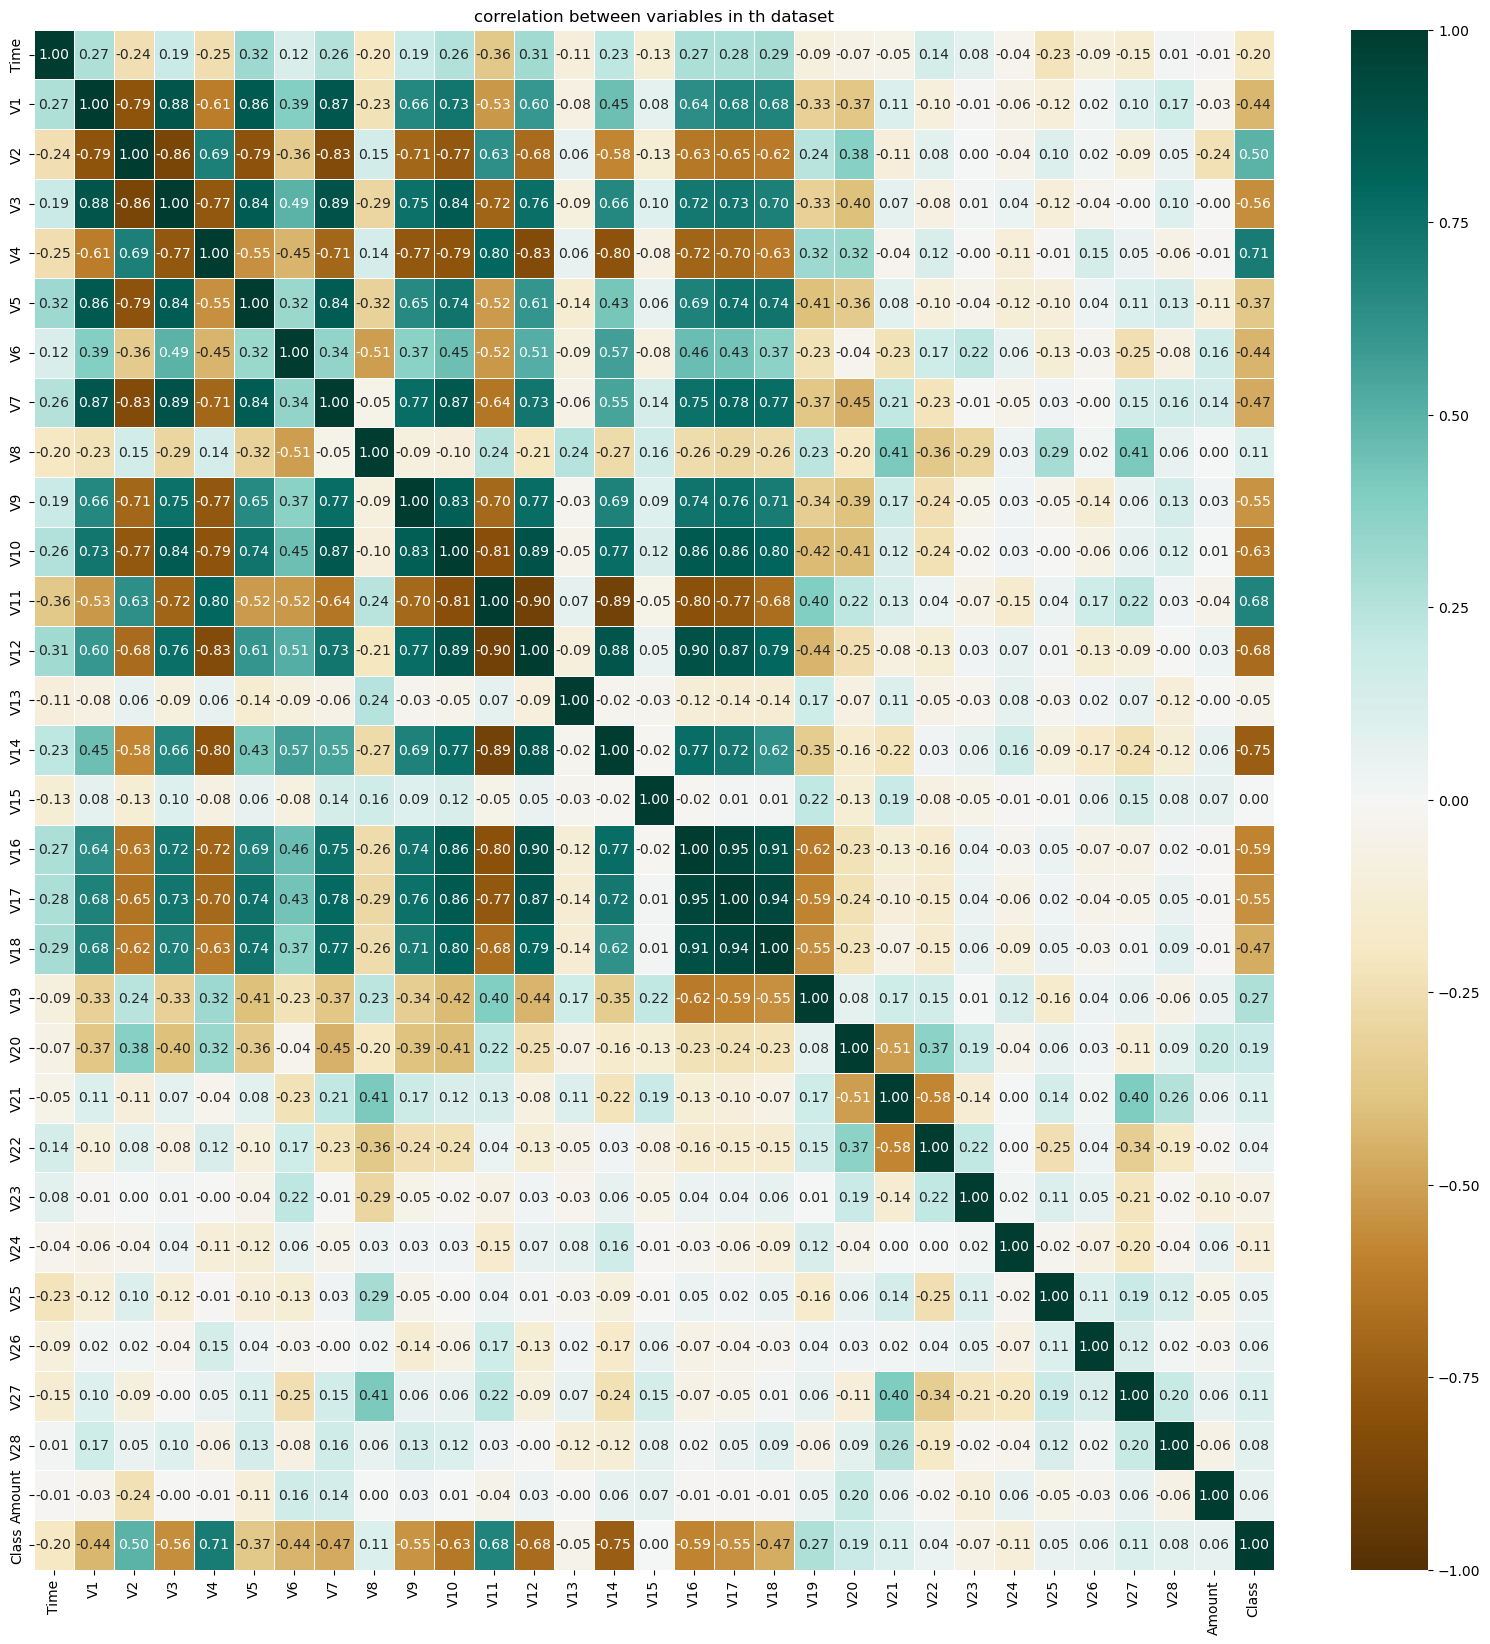

In [10]:
#heatmap to show correlation between variables
fig, ax = plt.subplots(figsize=(20,20))
corr=balanced.corr()
sns.heatmap(corr, ax = ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title( "correlation between variables in th dataset" )

In [11]:
#choosing columns that are most related to the target variable
columns = balanced.loc[:,(corr.Class >= 0.48) | (corr.Class <= -0.49)]
columns['Time'] = balanced['Time']
columns['Amount'] = balanced['Amount']

C:\Users\HP\AppData\Local\Temp\ipykernel_1136\3532859637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns['Time'] = balanced['Time']
C:\Users\HP\AppData\Local\Temp\ipykernel_1136\3532859637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns['Amount'] = balanced['Amount']


In [12]:
columns

,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,Class,Time,Amount
228731,-0.478449,0.769176,-2.803413,-1.867424,0.716164,-1.134605,-0.308958,-0.927460,-0.327281,-0.000180,0,145635.0,7.10
171303,-1.385472,1.728460,-1.162932,-0.182138,0.019475,-1.553396,-1.352118,0.078831,-1.279623,-0.491762,0,120579.0,67.00
46400,0.464852,0.938241,-0.351457,-0.527101,-0.303734,1.613083,0.135528,0.770016,-0.914728,0.538145,0,42772.0,10.52
53521,0.776150,1.387835,3.999294,-1.083267,1.008606,-0.348296,0.767616,-0.330943,0.432772,-0.262355,0,46022.0,7.58
247342,-0.467942,-1.638280,0.566833,0.686441,-0.504221,-0.621586,0.167023,-1.129339,0.563395,0.409285,0,153546.0,165.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.125653,-4.518331,1.749293,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,1,169142.0,390.00
280143,1.289381,-5.004247,1.411850,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,1,169347.0,0.76
280149,1.126366,-2.213700,0.468308,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,1,169351.0,77.89
281144,0.585864,-5.399730,1.817092,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,1,169966.0,245.00


In [14]:
balanced = balanced.loc[:, columns.columns]

In [15]:
balanced

,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,Class,Time,Amount
228731,-0.478449,0.769176,-2.803413,-1.867424,0.716164,-1.134605,-0.308958,-0.927460,-0.327281,-0.000180,0,145635.0,7.10
171303,-1.385472,1.728460,-1.162932,-0.182138,0.019475,-1.553396,-1.352118,0.078831,-1.279623,-0.491762,0,120579.0,67.00
46400,0.464852,0.938241,-0.351457,-0.527101,-0.303734,1.613083,0.135528,0.770016,-0.914728,0.538145,0,42772.0,10.52
53521,0.776150,1.387835,3.999294,-1.083267,1.008606,-0.348296,0.767616,-0.330943,0.432772,-0.262355,0,46022.0,7.58
247342,-0.467942,-1.638280,0.566833,0.686441,-0.504221,-0.621586,0.167023,-1.129339,0.563395,0.409285,0,153546.0,165.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.125653,-4.518331,1.749293,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,1,169142.0,390.00
280143,1.289381,-5.004247,1.411850,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,1,169347.0,0.76
280149,1.126366,-2.213700,0.468308,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,1,169351.0,77.89
281144,0.585864,-5.399730,1.817092,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,1,169966.0,245.00


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = balanced.drop(columns = 'Class')
y = balanced['Class']

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#Build and train the RandomForestClassifier model:
from sklearn.ensemble import RandomForestClassifier  

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
#Evaluate the performance of the model on the test set:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9430051813471503
Confusion Matrix:
 [[93  2]
 [ 9 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        95
           1       0.98      0.91      0.94        98

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.95      0.94      0.94       193



In [22]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [25]:
y_pred_dtree = d_tree.predict(X_test)
score_dtree = d_tree.score(X_test, y_test) #ver o percentual de acerto
print(score_dtree)
report=classification_report(y_true=y_test,y_pred=y_pred_dtree)
print(report)

0.9378238341968912
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.95      0.93      0.94        98

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193

